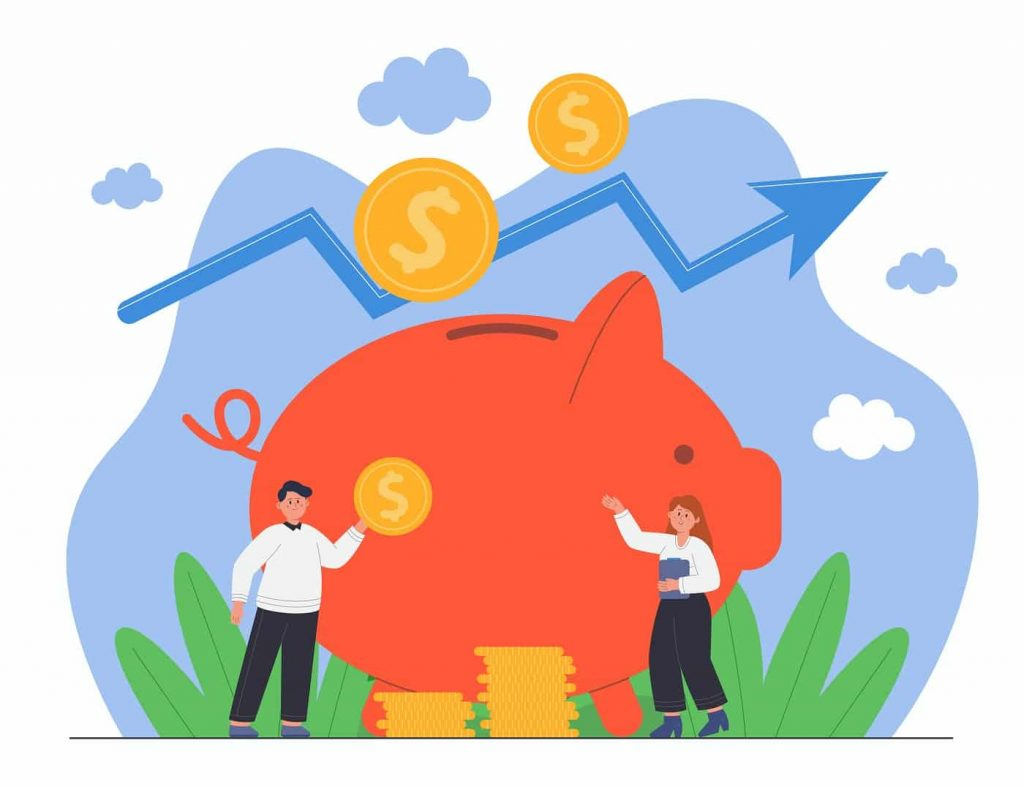

**DOMAIN** : Banking, Marketing

**CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

**PROJECT OBJECTIVE**: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert 
using the historical dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

%cd C:\Users\ajays\Dropbox\PGP-AIML\projects\marketingknnsvm

C:\Users\ajays\Dropbox\PGP-AIML\projects\marketingknnsvm


## Data Understanding and Preparation

### A. Read the dataframes

In [4]:
df_data1 = pd.read_csv('Data1.csv')
df_data2 = pd.read_csv('Data2.csv')

In [5]:
df_data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [6]:
df_data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


### B. Structure and shape of the dataframes

In [7]:
df_data1.shape

(5000, 8)

In [8]:
df_data2.shape

(5000, 7)

In [9]:
df_data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [10]:
df_data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

* *The 2 dataframes **can be merged on ID column** as it is the common label in two dataframes and **row size of both the dataframes is 5000***

### C. Dataframe unification

In [11]:
df = pd.merge(df_data1, df_data2, on='ID')

In [12]:
df.shape

(5000, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [14]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


### D. Data type handling

In [15]:
#converting binary features to object type
df['CreditCard'] = df['CreditCard'].astype('object')
df['InternetBanking'] = df['InternetBanking'].astype('object')
df['FixedDepositAccount'] = df['FixedDepositAccount'].astype('object')
df['Security'] = df['Security'].astype('object')
df['Level'] = df['Level'].astype('object')
df['HiddenScore'] = df['HiddenScore'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


## Data Exploration and Analysis

### A. Visualization

Checking the distribution of LoanOnCard feature, we have:

In [16]:
df['LoanOnCard'].value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

<Axes: xlabel='LoanOnCard', ylabel='count'>

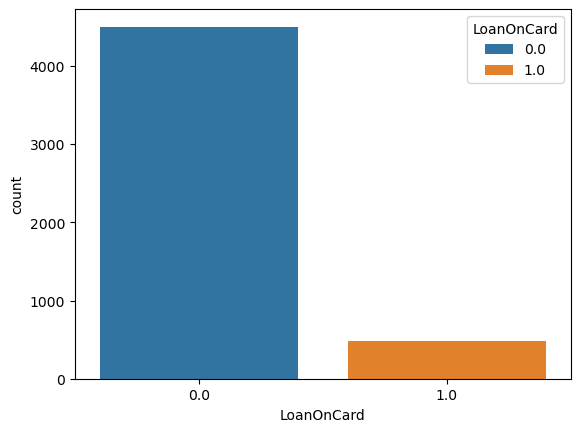

In [17]:
sns.countplot(data=df, x='LoanOnCard', hue='LoanOnCard')

In [18]:
df['LoanOnCard'].value_counts(normalize=True)

LoanOnCard
0.0    0.903614
1.0    0.096386
Name: proportion, dtype: float64

* *There are **only 4980 values for LoanOnCard** whereas there are 5000 rows, which means that **20 rows have missing values** for the feature*
* ***90.4% of the customers do not have a loan on their card***

In [19]:
df.isna().sum()/df.shape[0] * 100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

* ***0.4%** of the data rows has **missing values for LoanOnCard feature***
* *LoanOnCard is a **binary feature** and should have a 0 or 1. A missing value probably indicates that the customer does not have a loan on the credit card as this variable was not updated in original data. **We can impute the NaN data to 0***.

### B. Handle missing values

In [20]:
df['LoanOnCard'].fillna(0.0, inplace=True)
df.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### C. Handle unexpected values

Checking each categorical feature for unexpected values

In [21]:
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [22]:
df['InternetBanking'].value_counts()

InternetBanking
1    2984
0    2016
Name: count, dtype: int64

In [23]:
df['FixedDepositAccount'].value_counts()

FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64

In [24]:
df['Security'].value_counts()

Security
0    4478
1     522
Name: count, dtype: int64

In [25]:
df['Level'].value_counts()

Level
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [26]:
df['HiddenScore'].value_counts()

HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

* *The categories seem to be **labelled as whole numbers** which seems to be valid expected data*

## Data Preparation and Model Building

### A. Data split into features and target

Features ID and ZipCode are not useful to build the model and can be safely dropped

In [27]:
df.drop(columns=['ID','ZipCode'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   object 
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   object 
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   object 
 8   FixedDepositAccount  5000 non-null   object 
 9   InternetBanking      5000 non-null   object 
 10  CreditCard           5000 non-null   object 
 11  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 468.9+ KB


In [28]:
#X = features
X = df.iloc[:, :-1]
X

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [29]:
#y = target
y = df['LoanOnCard']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64

### B. Data split into training and testing set

In [30]:
#split into training and test data in 75:25 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [31]:
X_train.shape

(3750, 11)

In [32]:
X_test.shape

(1250, 11)

In [33]:
y_train.shape

(3750,)

In [34]:
y_test.shape

(1250,)

### C. Logistic Regression

In [35]:
lr_model = LogisticRegression()
#fit on train
lr_model.fit(X_train, y_train)
#predict on test
y_pred_test = lr_model.predict(X_test)
disp_df = pd.DataFrame()
for i in range(0, X_train.shape[1]):
    disp_df['Coeff of '+ X_train.columns[i]] = [lr_model.coef_[0][i]]
disp_df['intercept'] = lr_model.intercept_
disp_df

C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Coeff of Age,Coeff of CustomerSince,Coeff of HighestSpend,Coeff of HiddenScore,Coeff of MonthlyAverageSpend,Coeff of Level,Coeff of Mortgage,Coeff of Security,Coeff of FixedDepositAccount,Coeff of InternetBanking,Coeff of CreditCard,intercept
0,-0.499643,0.504626,0.051365,0.647233,0.102045,1.707446,0.000274,0.198963,2.534353,-0.476559,-0.548124,-0.426644


### D. Performance Metrics

In [36]:
def confusion_matrix_map(model, target, predicted):
    cm = confusion_matrix(target, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Truth")
    plt.xlabel("Prediction")
    
def model_performance(model, target, predicted):
    print('Confusion Matrix:')
    print(confusion_matrix_map(model, target, predicted))
    print('Classification Report:')
    print(classification_report(target, predicted))
    

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3380
         1.0       0.82      0.62      0.71       370

    accuracy                           0.95      3750
   macro avg       0.89      0.80      0.84      3750
weighted avg       0.95      0.95      0.95      3750



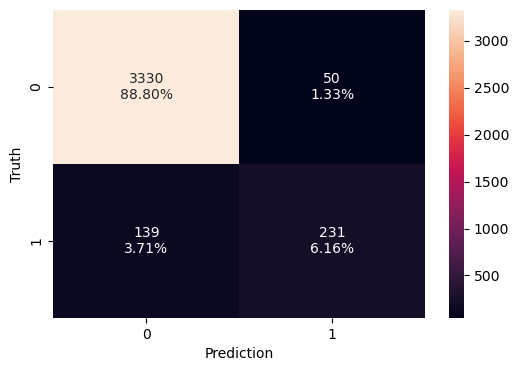

In [37]:
#confusion matrix on training data
y_pred_train = lr_model.predict(X_train)
model_performance(lr_model, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1140
         1.0       0.82      0.55      0.66       110

    accuracy                           0.95      1250
   macro avg       0.89      0.77      0.82      1250
weighted avg       0.95      0.95      0.95      1250



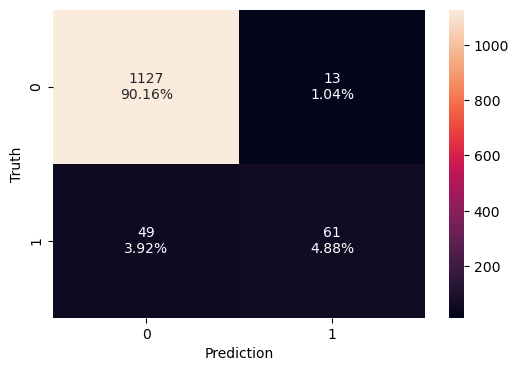

In [38]:
#model performance on test data
y_pred_test = lr_model.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

* *The data is **highly skewed towards the LoanOnCard = 0** feature value. Hence the model has a **very high accuracy score on training and test data but may not be very useful***

### E. Data balancing

The current skew on LoanOnCard feature is about 90:10 in favour of 0 value. We need to bring this to 50:50 by the **SMOTE oversampling method by generating synthetic samples for the LoanOnCard = 1 samples**

In [39]:
y_train.value_counts()

LoanOnCard
0.0    3380
1.0     370
Name: count, dtype: int64

In [40]:
X_train.shape

(3750, 11)

In [41]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [42]:
y_train_sm.value_counts()

LoanOnCard
1.0    3380
0.0    3380
Name: count, dtype: int64

In [43]:
X_train_sm.shape

(6760, 11)

### F. Retraining

In [44]:
lr_model = LogisticRegression()
#fit on SMOTEd train
lr_model.fit(X_train_sm, y_train_sm)
#predict on test
y_pred_test = lr_model.predict(X_test)
disp_df = pd.DataFrame()
for i in range(0, X_train.shape[1]):
    disp_df['Coeff of '+ X_train.columns[i]] = [lr_model.coef_[0][i]]
disp_df['intercept'] = lr_model.intercept_
disp_df

C:\Users\ajays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Coeff of Age,Coeff of CustomerSince,Coeff of HighestSpend,Coeff of HiddenScore,Coeff of MonthlyAverageSpend,Coeff of Level,Coeff of Mortgage,Coeff of Security,Coeff of FixedDepositAccount,Coeff of InternetBanking,Coeff of CreditCard,intercept
0,-0.434671,0.43996,0.054201,0.671907,0.247387,1.623062,0.000253,0.004827,3.316557,-0.55443,-0.636743,-0.517751


Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      3380
         1.0       0.90      0.91      0.90      3380

    accuracy                           0.90      6760
   macro avg       0.90      0.90      0.90      6760
weighted avg       0.90      0.90      0.90      6760



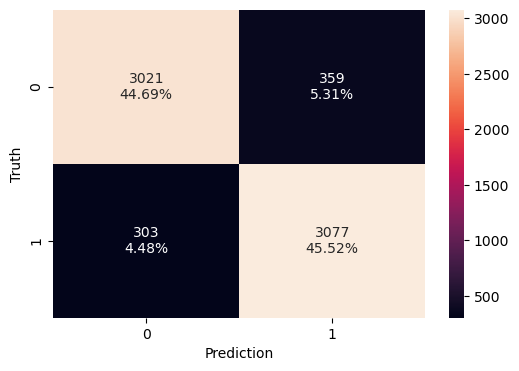

In [45]:
#confusion matrix on SMOTEd training data
y_pred_train = lr_model.predict(X_train_sm)
model_performance(lr_model, y_train_sm, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1140
         1.0       0.43      0.88      0.57       110

    accuracy                           0.88      1250
   macro avg       0.71      0.88      0.75      1250
weighted avg       0.94      0.88      0.90      1250



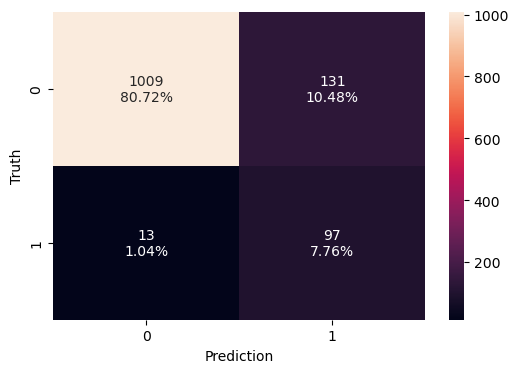

In [46]:
#confusion matrix on test data
model_performance(lr_model, y_test, y_pred_test)

### G. Revaluation and Comparison

*Comparing confusion matrices and classification reports for cells [38] and [46], we find:*
* ***Accuracy dipped from <font color='red'>95% -> 89%</font>***
* ***Precision for LoanOnCard = 0 increased from <font color='green'>96% -> 99%</font>***
* ***Precision for LoanOnCard = 1 increased from <font color='green'>82% -> 90%</font>***
* ***Recall for LoanOnCard = 0 dipped from <font color='red'>99% -> 89%</font>***
* ***Recall for LoanOnCard = 1 increased from <font color='green'>55% -> 88%</font>***
* ***F1 score for LoanOnCard = 0 dipped from <font color='red'>97% -> 93%</font>***
* ***F1 score for LoanOnCard = 1 dipped from <font color='red'>66% -> 58%</font>***


## Performance Improvement

### A. SVM, KNN

#### Base KNN model with default k=5

In [47]:
#classifer with default k=5
knn_default = KNeighborsClassifier()

#fit the model for the training data
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      3380
         1.0       0.77      0.57      0.65       370

    accuracy                           0.94      3750
   macro avg       0.86      0.78      0.81      3750
weighted avg       0.94      0.94      0.94      3750



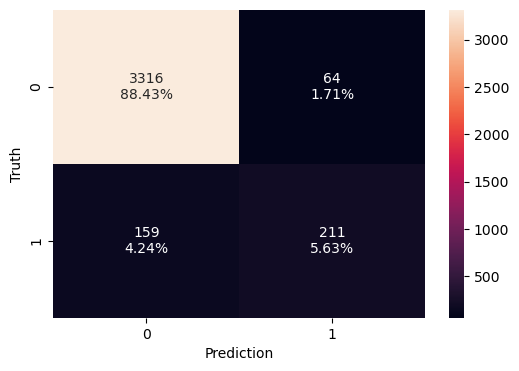

In [48]:
#prediction on training data
y_pred_train = knn_default.predict(X_train)

#model performance on training data 
model_performance(knn_default, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1140
         1.0       0.45      0.31      0.37       110

    accuracy                           0.91      1250
   macro avg       0.69      0.64      0.66      1250
weighted avg       0.89      0.91      0.90      1250



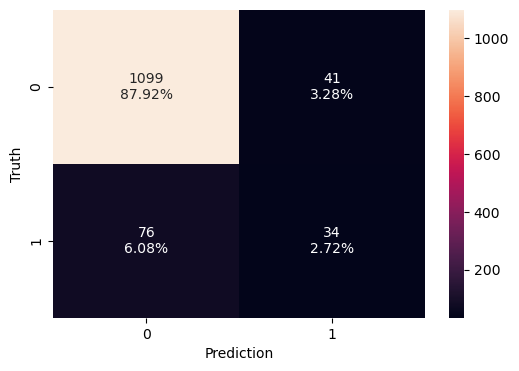

In [49]:
#prediction on test data
y_pred_test = knn_default.predict(X_test)

##model performance on test data
model_performance(knn_default, y_test, y_pred_test)

#### Base SVM model with default gamma='scale' and default C=1

In [50]:
svc_default = SVC()
svc_default.fit(X_train, y_train)

SVC()

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3380
         1.0       0.74      0.13      0.22       370

    accuracy                           0.91      3750
   macro avg       0.83      0.56      0.59      3750
weighted avg       0.90      0.91      0.88      3750



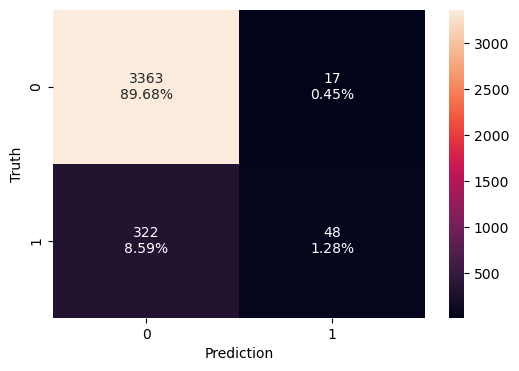

In [51]:
#prediction on training data
y_pred_train = svc_default.predict(X_train)

#model performance on training data 
model_performance(svc_default, y_train, y_pred_train)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1140
         1.0       0.64      0.08      0.15       110

    accuracy                           0.92      1250
   macro avg       0.78      0.54      0.55      1250
weighted avg       0.89      0.92      0.88      1250



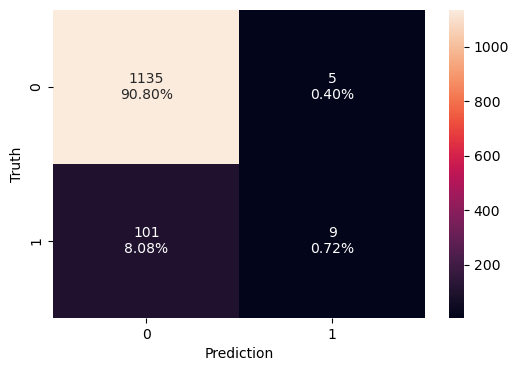

In [52]:
#prediction on test data
y_pred_test = svc_default.predict(X_test)

##model performance on test data
model_performance(svc_default, y_test, y_pred_test)

### B. Parameter tuning

#### Tuning for KNN

In [53]:
test_recall_0_score=[]
test_recall_1_score=[]
test_precision_0_score=[]
test_precision_1_score=[]
test_acc_score=[]
# odd number for neighbours from [1, 30)
neighbours = [k for k in np.arange(1, 100, 2)]
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    test_acc_score.append(accuracy_score(y_test, y_pred_test)) 
    rsc = recall_score(y_test, y_pred_test, average=None)
    test_recall_0_score.append(rsc[0])
    test_recall_1_score.append(rsc[1])
    psc = precision_score(y_test, y_pred_test, average=None)
    test_precision_0_score.append(psc[0])
    test_precision_1_score.append(psc[1])

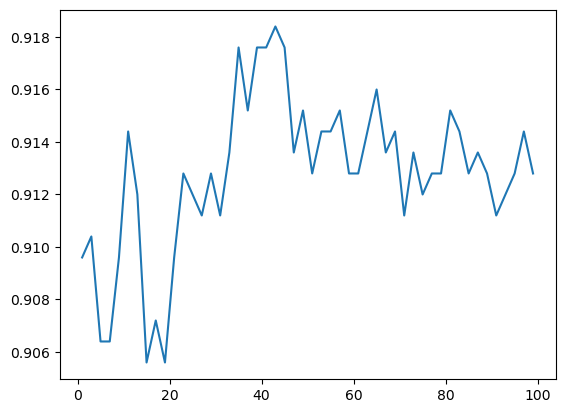

In [54]:
plt.plot(neighbours, test_acc_score)

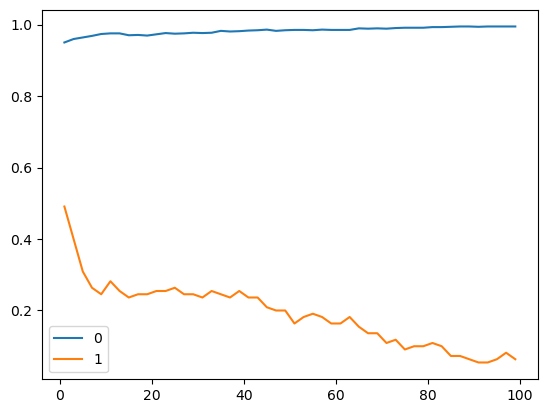

In [55]:
plt.plot(neighbours, test_recall_0_score)
plt.plot(neighbours, test_recall_1_score)
plt.legend(['0', '1'])
plt.show()

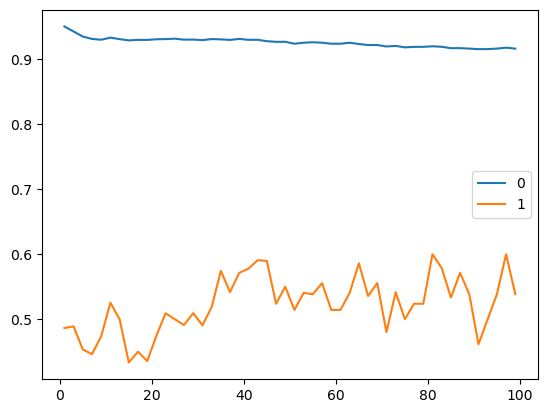

In [56]:
plt.plot(neighbours, test_precision_0_score)
plt.plot(neighbours, test_precision_1_score)
plt.legend(['0', '1'])
plt.show()

* *As the problem is related to **targeted marketing**, we are interested in knowing whether we can **identify potential customers (LoanOnCard = 1)** because these will potentially bring in **more business to the bank**. We want to **avoid predicting 0 when truth = 1**, hence we want to **avoid false negatives**. So **precision becomes a dominating factor** in determining the best model.*
* *KNN is showing **highest precision values throughout for Class 0**. However, for values of **k near 40-50, the values for precision has high peaks.***
* *Near the same **range of k between 40-50, we are seeing higher recall values** than any k value greater than this range.*
* *Near the same range of **k between 40-50, we are seeing highest accuracy values***
* ***Recall values are continuously dropping as k increases**. Hence it is best to choose as low k value as possible that shows high precision values.*

In [57]:
for n in np.arange(41, 50, 2):
    print("k = " + str(n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    print(classification_report(y_test, y_pred_test))

k = 41
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1140
         1.0       0.58      0.24      0.34       110

    accuracy                           0.92      1250
   macro avg       0.75      0.61      0.65      1250
weighted avg       0.90      0.92      0.90      1250

k = 43
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1140
         1.0       0.59      0.24      0.34       110

    accuracy                           0.92      1250
   macro avg       0.76      0.61      0.65      1250
weighted avg       0.90      0.92      0.90      1250

k = 45
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1140
         1.0       0.59      0.21      0.31       110

    accuracy                           0.92      1250
   macro avg       0.76      0.60      0.63      1250
weighted avg       0.90      0.92      0.90      1250

* *From the above reports we can conclude that **k=43 is the best value** for the KNN model*

#### Tuning for SVM

In [58]:
#Hyperparameter tuning using Gridsearch
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [59]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [60]:
grid.best_score_

0.9663999999999999

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1140
         1.0       0.94      0.71      0.81       110

    accuracy                           0.97      1250
   macro avg       0.96      0.85      0.90      1250
weighted avg       0.97      0.97      0.97      1250



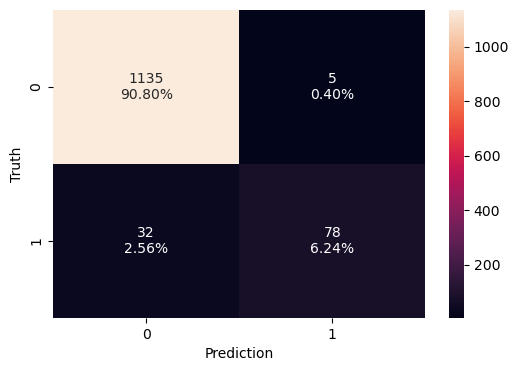

In [61]:
svc = SVC(gamma=0.0001, C=1000)
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
model_performance(svc, y_test, y_pred_test)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3380
         1.0       0.95      0.84      0.89       370

    accuracy                           0.98      3750
   macro avg       0.97      0.92      0.94      3750
weighted avg       0.98      0.98      0.98      3750



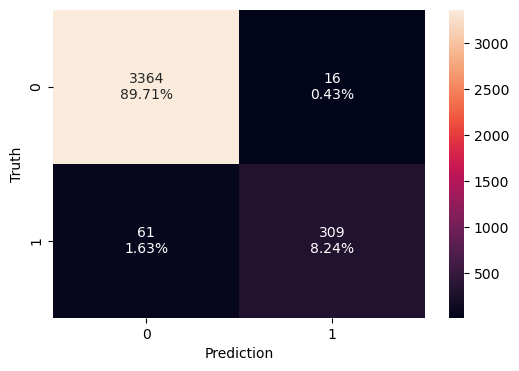

In [62]:
y_pred_train = svc.predict(X_train)
model_performance(svc, y_train, y_pred_train)

### C. Performance metrics

*So far we have built 3 tuned models for our problem:*
* *Logistic regression model after data balancing*
* *Tuned KNN model for k=43*
* *Tuned SVM RBF kernel model with C=1000 and gamma=0.0001*

*We will now conclude on a model depending on high accuracy, precision, recall as needed depending on the problem characteristics.*

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1140
         1.0       0.43      0.88      0.57       110

    accuracy                           0.88      1250
   macro avg       0.71      0.88      0.75      1250
weighted avg       0.94      0.88      0.90      1250



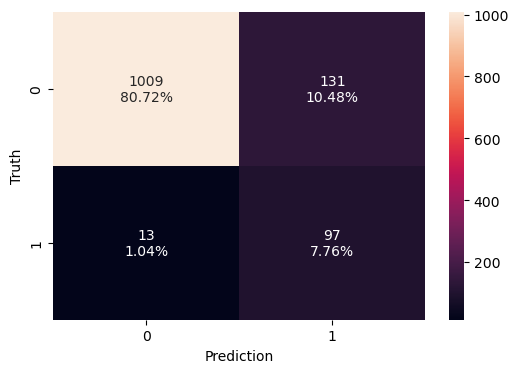

In [63]:
#logistic regression model performance on test data
y_pred_test = lr_model.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1140
         1.0       0.55      0.20      0.29       110

    accuracy                           0.92      1250
   macro avg       0.74      0.59      0.62      1250
weighted avg       0.89      0.92      0.90      1250



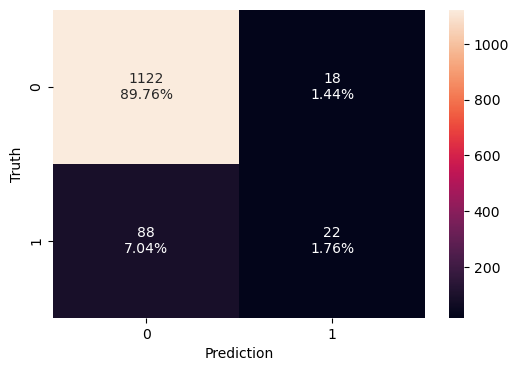

In [64]:
#Tuned knn model's performance with k=43
knn43 = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
model_performance(lr_model, y_test, y_pred_test)

Confusion Matrix:
None
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1140
         1.0       0.94      0.71      0.81       110

    accuracy                           0.97      1250
   macro avg       0.96      0.85      0.90      1250
weighted avg       0.97      0.97      0.97      1250



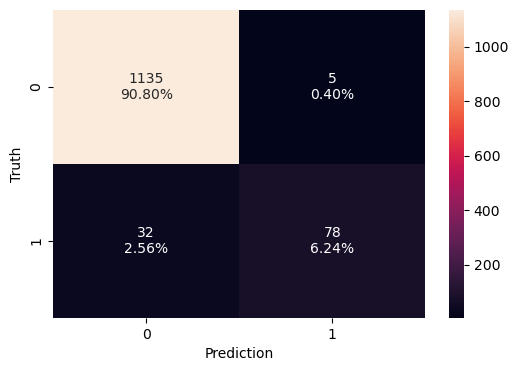

In [65]:
svc = SVC(gamma=0.0001, C=1000)
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
model_performance(svc, y_test, y_pred_test)

* *Based on the above findings, **we will choose the Tuned SVM model** to predict the customer conversion for the bank*
* *The tuned SVM model has a **high accuracy of 97%** and **high precision score of 97% and 94% respectively for classes LoanOnCard as 0 and 1***.
* *It also has **almost perfect recall for LoanOnCard=0 class** and has a decent **recall of 71% for LoanOnCard=1 class***

### D. Performance improvement

*Comparing confusion matrices and classification reports for cells [52] (original base SVM model with default values) and [65](tuned SVM model) on test data, we find that:*
* ***Accuracy increased from <font color='green'>92% -> 97%</font>***
* ***Precision for LoanOnCard = 0 increased from <font color='green'>92% -> 97%</font>***
* ***Precision for LoanOnCard = 1 increased from <font color='green'>74% -> 94%</font>***
* ***Recall for LoanOnCard = 0 increased from <font color='green'>99% -> ~100%%</font>***
* ***Recall for LoanOnCard = 1 increased from <font color='green'>8% -> 71%</font>***
* ***F1 score for LoanOnCard = 0 increased from <font color='green'>96% -> 98%</font>***
* ***F1 score for LoanOnCard = 1 increased from <font color='green'>15% -> 81%</font>***
